In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
reviews = pd.read_csv("wine.csv", index_col=0)
reviews.head(3)

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley


In [22]:
# 1. Bar Chart: Top 10 Wine-Producing Provinces
# 2. Proportion of Top 10 Wine-Producing Provinces
# 3. Bar Chart: Number of Reviews by Score
# 4. Line Chart: Number of Reviews by Score
# 5. Area Chart: Wine Review Scores Distribution
# 6. Histogram: Wine Prices (<$200)
# 7. Histogram: Wine Prices (All)

## Bar charts and categorical data

Bar charts are arguably the simplest data visualization. They map categories to numbers: the amount of eggs consumed for breakfast (a category) to a number breakfast-eating Americans, for example; or, in our case, wine-producing provinces of the world (category) to the number of labels of wines they produce (number):

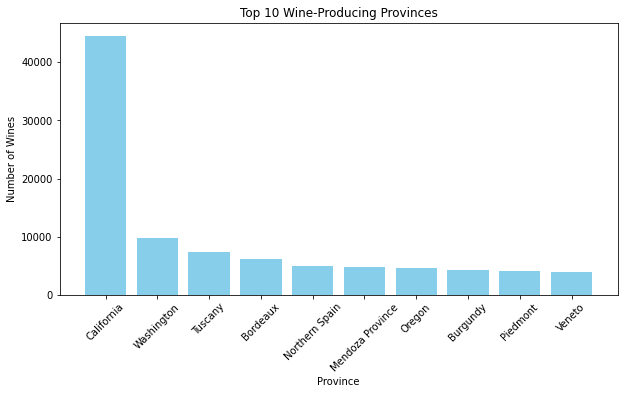

In [14]:
province_counts = reviews['province'].value_counts().head(10)

plt.figure(figsize=(10, 5))
plt.bar(province_counts.index, province_counts.values, color='skyblue')
plt.xlabel("Province")
plt.ylabel("Number of Wines")
plt.title("Top 10 Wine-Producing Provinces")
plt.xticks(rotation=45)
plt.show()


What does this plot tell us? It says California produces far more wine than any other province of the world! We might ask what percent of the total is Californian vintage? This bar chart tells us absolute numbers, but it's more useful to know relative proportions. No problem:

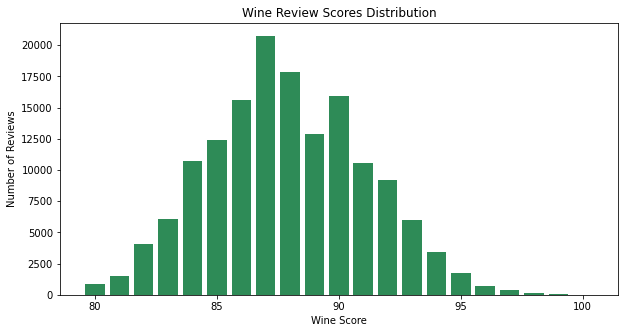

In [17]:
points_counts = reviews['points'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
plt.bar(points_counts.index, points_counts.values, color='seagreen')
plt.xlabel("Wine Score")
plt.ylabel("Number of Reviews")
plt.title("Wine Review Scores Distribution")
plt.show()


As you can see, every vintage is allotted an overall score between 80 and 100; and, if we are to believe that Wine Magazine is an arbiter of good taste, then a 92 is somehow meaningfully "better" than a 91.

## Line charts

The wine review scorecard has 20 different unique values to fill, for which our bar chart is just barely enough. What would we do if the magazine rated things 0-100? We'd have 100 different categories; simply too many to fit a bar in for each one!

In that case, instead of bar chart, we could use a line chart:

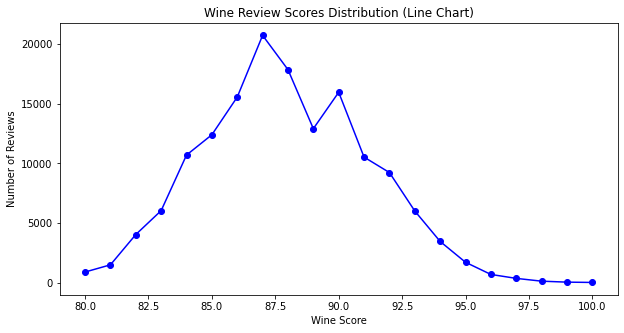

In [18]:
plt.figure(figsize=(10, 5))
plt.plot(points_counts.index, points_counts.values, color='blue', marker='o', linestyle='-')
plt.xlabel("Wine Score")
plt.ylabel("Number of Reviews")
plt.title("Wine Review Scores Distribution (Line Chart)")
plt.show()


A line chart can pass over any number of many individual values, making it the tool of first choice for distributions with many unique values or categories.

However, line charts have an important weakness: unlike bar charts, they're not appropriate for nominal categorical data. While bar charts distinguish between every "type" of point line charts mushes them together. So a line chart asserts an order to the values on the horizontal axis, and the order won’t make sense with some data. After all, a "descent" from California to Washington to Tuscany doesn't mean much!

Line charts also make it harder to distinguish between individual values.

In general, if your data can fit into a bar chart, just use a bar chart!

## Quick break: bar or line

Let's do a quick exercise. Suppose that we're interested in counting the following variables:

1. The number of tubs of ice cream purchased by flavor, given that there are 5 different flavors.
2. The average number of cars purchased from American car manufacturers in Michigan.
3. Test scores given to students by teachers at a college, on a 0-100 scale.
4. The number of restaurants located on the street by the name of the street in Lower Manhattan.

For which of these would a bar chart be better? Which ones would be better off with a line?

To see the answer, click the "Output" button on the code block below.

## Area charts

Area charts are just line charts, but with the bottom shaded in. That's it!

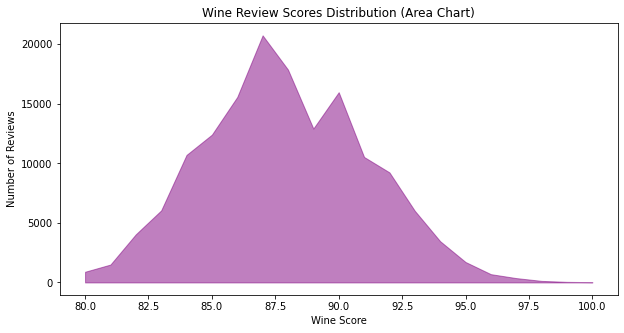

In [19]:
plt.figure(figsize=(10, 5))
plt.fill_between(points_counts.index, points_counts.values, color='purple', alpha=0.5)
plt.xlabel("Wine Score")
plt.ylabel("Number of Reviews")
plt.title("Wine Review Scores Distribution (Area Chart)")
plt.show()


When plotting only one variable, the difference between an area chart and a line chart is mostly visual. In this context, they can be used interchangably.

## Interval data

Let's move on by looking at yet another type of data, an **interval variable**.

Examples of interval variables are the wind speed in a hurricane, shear strength in concrete, and the temperature of the sun. An interval variable goes beyond an ordinal categorical variable: it has a *meaningful* order, in the sense that we can quantify what the difference between two entries is itself an interval variable.

For example, if I say that this sample of water is -20 degrees Celcius, and this other sample is 120 degrees Celcius, then I can quantify the difference between them: 140 degrees "worth" of heat, or such-and-such many joules of energy.

The difference can be qualitative sometimes. At a minimum, being able to state something so clearly feels a lot more "measured" than, say, saying you'll buy this wine and not that one, because this one scored a 92 on some taste test and that one only got an 85. More definitively, any variable that has infinitely many possible values is definitely an interval variable (why not 120.1 degrees? 120.001? 120.0000000001? Etc).

Line charts work well for interval data. Bar charts don't—unless your ability to measure it is very limited, interval data will naturally vary by quite a lot.

Let's apply a new tool, the histogram, to an interval variable in our dataset, price (we'll cut price off at 200$ a bottle; more on why shortly).

## Histograms

Here's a histogram:

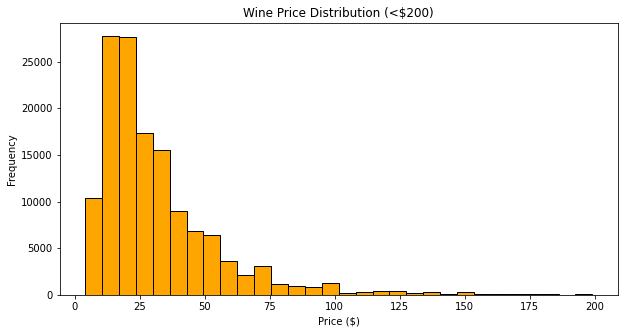

In [20]:
filtered_prices = reviews[reviews['price'] < 200]['price']

plt.figure(figsize=(10, 5))
plt.hist(filtered_prices, bins=30, color='orange', edgecolor='black')
plt.xlabel("Price ($)")
plt.ylabel("Frequency")
plt.title("Wine Price Distribution (<$200)")
plt.show()

A histogram looks, trivially, like a bar plot. And it basically is! In fact, a histogram is special kind of bar plot that splits your data into even intervals and displays how many rows are in each interval with bars. The only analytical difference is that instead of each bar representing a single value, it represents a range of values.

However, histograms have one major shortcoming (the reason for our 200$ caveat earlier). Because they break space up into even intervals, they don't deal very well with skewed data:

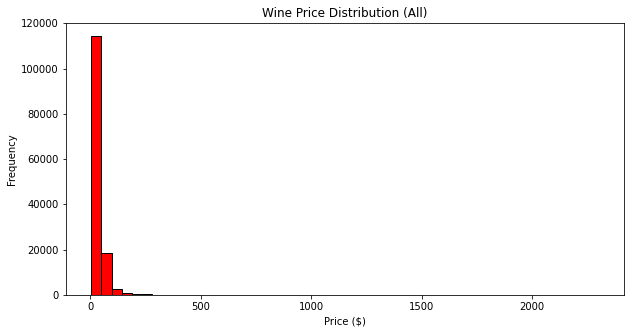

In [21]:
plt.figure(figsize=(10, 5))
plt.hist(reviews['price'].dropna(), bins=50, color='red', edgecolor='black')
plt.xlabel("Price ($)")
plt.ylabel("Frequency")
plt.title("Wine Price Distribution (All)")
plt.show()
